In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
df <- read_csv("../../data/AAPL_GOOG_prices.csv")
head(df)

Rows: 4840 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): AAPL, GOOG
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,AAPL,GOOG
<date>,<dbl>,<dbl>
2004-08-19,0.4654742,2.499133
2004-08-20,0.4668381,2.697639
2004-08-23,0.4710819,2.724787
2004-08-24,0.4842689,2.611960
2004-08-25,0.5009419,2.640104
2004-08-26,0.5253449,2.687676


To begin with, it is nice to work get a grasp of what is going on with the time series at hand. We can use a line chart for that.

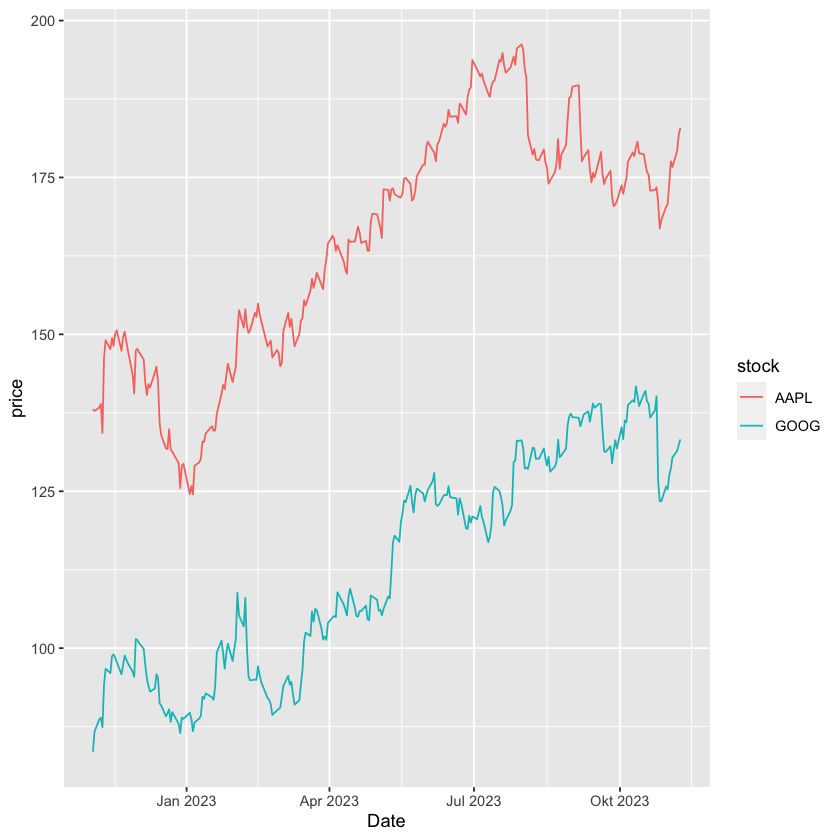

In [29]:
df <- tail(df, 255) # Past year, there are ~255 bussiness days in a year.

df %>%
    pivot_longer(c(`AAPL`, `GOOG`), names_to = "stock", values_to = "price") %>% # Needs data to be in long format, part of comming lectures
    ggplot(aes(x = Date, y = price, color = stock)) +
    geom_line()

To calculate returns, you can use the following formula:
$\displaystyle R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$.

Lets look at the distribution of returns in from the data. We can use a histogram for that.

Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


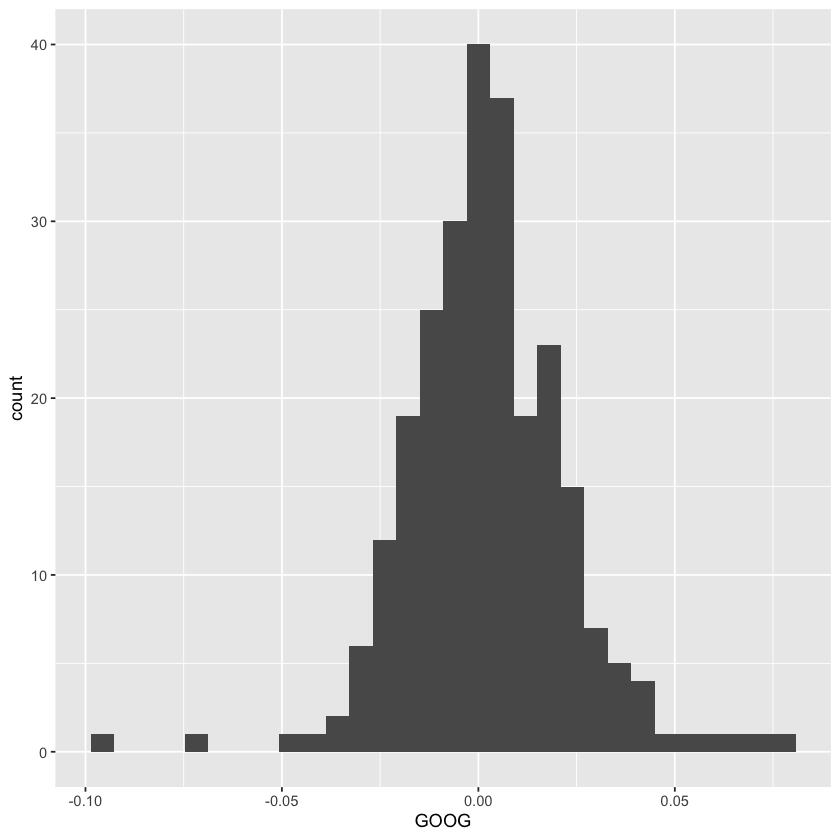

In [47]:
ret <- df %>%
            mutate(AAPL = AAPL/lag(AAPL) -1, GOOG= GOOG/lag(GOOG) -1 )
ret %>%
    ggplot() +
    geom_histogram(aes(x=GOOG), bins=30)

How are, the two stocks related? We can use a scatter plot to gain an unsderstanding of that.

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


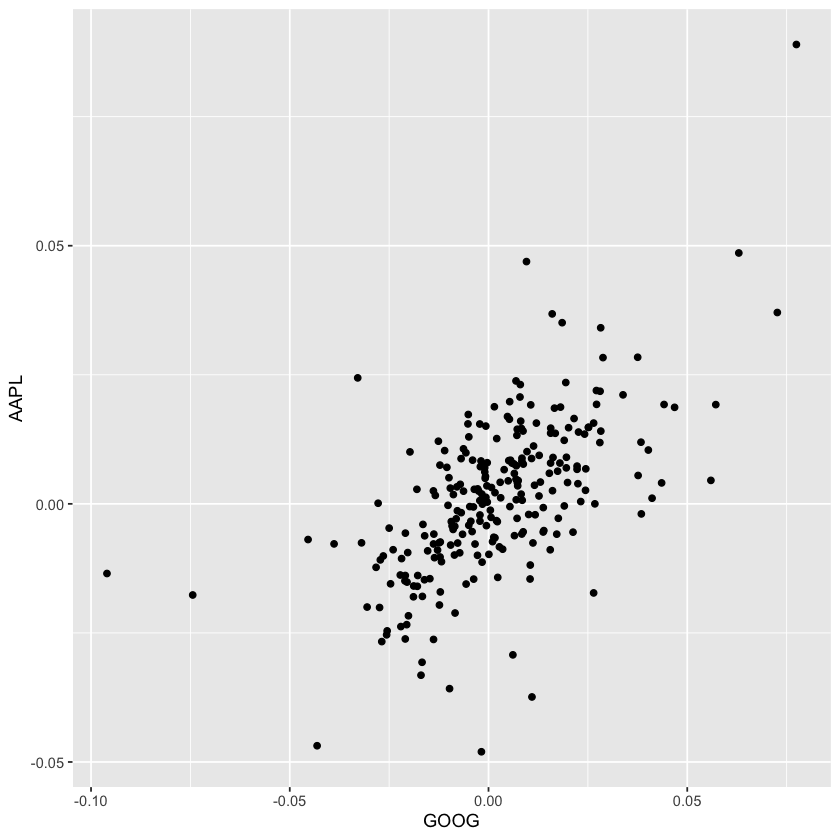

In [49]:
ret %>%
    ggplot() +
    geom_point(aes(x=GOOG, y=AAPL))

Box plot to compare the moments of the different distriubtions

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


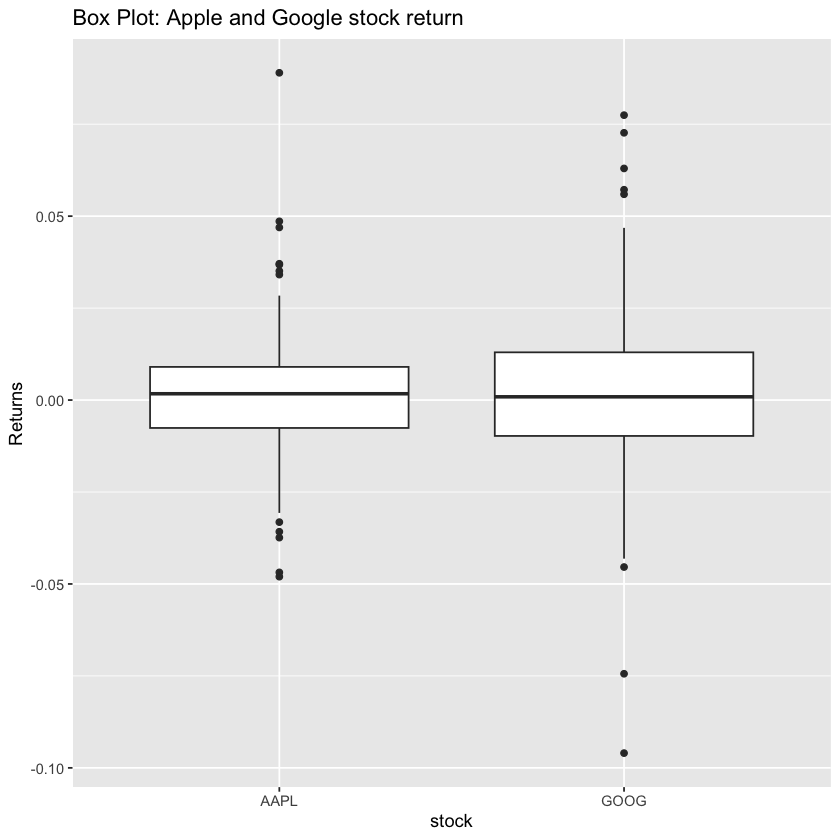

In [57]:
ret %>%
    pivot_longer(c(`AAPL`, `GOOG`), names_to = "stock", values_to = "ret") %>% # Needs data to be in long format, part of comming lectures
    ggplot()+
    geom_boxplot(aes(x=stock, y=ret))+
    labs(title="Box Plot: Apple and Google stock return", y="Returns")

#ret.plot.box()
#plt.title("Box Plot: Apple and Google stock return")
#plt.ylabel("Price in USD")

Now, lets look a trading strategy, allocating $w_1$ on Apple and $w_2$ on Google. They should add up to 1.

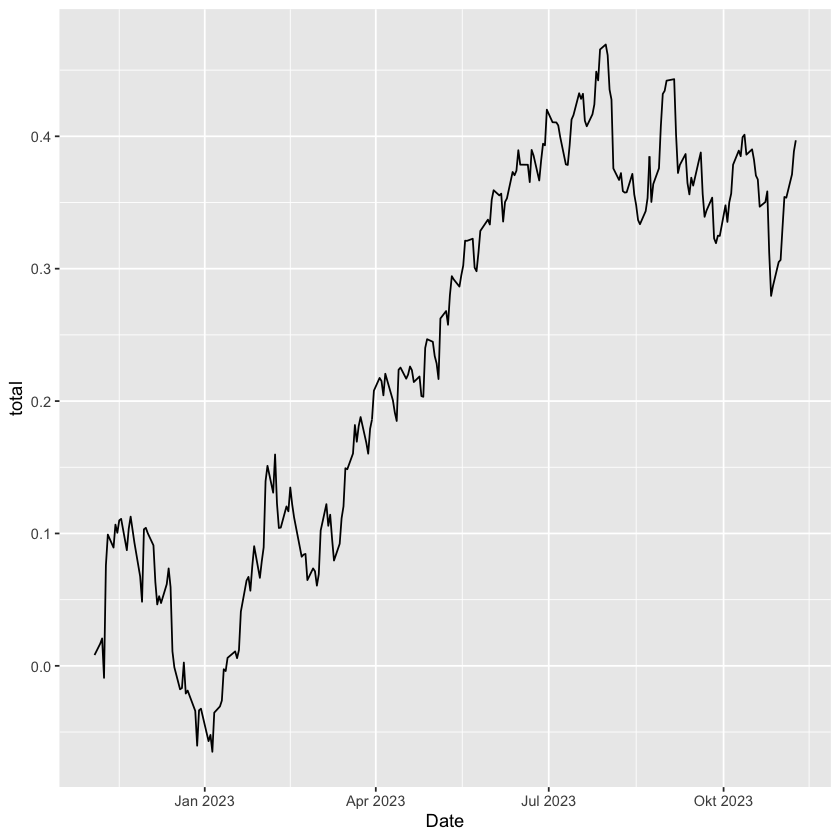

In [96]:
w <- c(0.75, 0.25)

portfolio_ret = ret %>%
                mutate(total = w[1]*AAPL + w[2]*GOOG, replace=TRUE) %>%
                select(Date, total) %>% na.omit()

portfolio_ret %>% 
                mutate(total = cumprod(total + 1) - 1) %>%
                ggplot() +
                geom_line(aes(x=Date, y=total))

Compare moments of our strategy to Apple or Google only strategy.

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


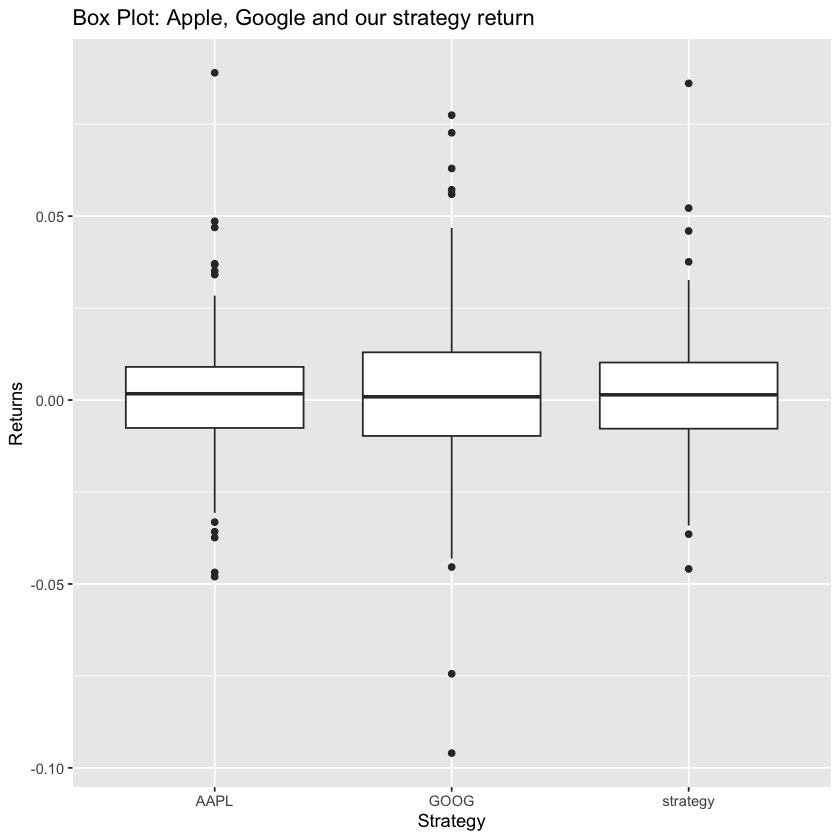

In [104]:
ret %>% 
    mutate(strategy=c(NA, portfolio_ret$total)) %>%
    pivot_longer(c(`AAPL`, `GOOG`, `strategy`), names_to = "stock", values_to = "ret") %>% # Needs data to be in long format, part of comming lectures
    ggplot()+
    geom_boxplot(aes(x=stock, y=ret))+
    labs(title="Box Plot: Apple, Google and our strategy return",x="Strategy", y="Returns")